In [26]:
import torch
from data_preprocessing import *
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def create_2d_sinusoidal_encoding(H, W, D):
    """
    creates a 2d sinusoidal encoding to fix problems like wrap around lon/lats
    """
    y_pos = torch.arange(H).unsqueeze(1).repeat(1, W)
    x_pos = torch.arange(W).unsqueeze(0).repeat(H, 1)
    pe = torch.zeros(H, W, D)
    div_term = torch.exp(torch.arange(0, D, 2) * -(np.log(10000.0) / D))
    
    # Add unsqueeze(-1) to broadcast properly
    pe[..., 0::2] = torch.sin(x_pos.unsqueeze(-1) * div_term)
    pe[..., 1::2] = torch.cos(y_pos.unsqueeze(-1) * div_term)
    return pe


In [60]:
create_2d_sinusoidal_encoding(H=8, W=8, D=2)

tensor([[[ 0.0000,  1.0000],
         [ 0.8415,  1.0000],
         [ 0.9093,  1.0000],
         [ 0.1411,  1.0000],
         [-0.7568,  1.0000],
         [-0.9589,  1.0000],
         [-0.2794,  1.0000],
         [ 0.6570,  1.0000]],

        [[ 0.0000,  0.5403],
         [ 0.8415,  0.5403],
         [ 0.9093,  0.5403],
         [ 0.1411,  0.5403],
         [-0.7568,  0.5403],
         [-0.9589,  0.5403],
         [-0.2794,  0.5403],
         [ 0.6570,  0.5403]],

        [[ 0.0000, -0.4161],
         [ 0.8415, -0.4161],
         [ 0.9093, -0.4161],
         [ 0.1411, -0.4161],
         [-0.7568, -0.4161],
         [-0.9589, -0.4161],
         [-0.2794, -0.4161],
         [ 0.6570, -0.4161]],

        [[ 0.0000, -0.9900],
         [ 0.8415, -0.9900],
         [ 0.9093, -0.9900],
         [ 0.1411, -0.9900],
         [-0.7568, -0.9900],
         [-0.9589, -0.9900],
         [-0.2794, -0.9900],
         [ 0.6570, -0.9900]],

        [[ 0.0000, -0.6536],
         [ 0.8415, -0.6536],
      

In [28]:
gebco_file = 'data/gebco/bodc/gebco/global/gebco_2025/ice_surface_elevation/netcdf/GEBCO_2025.nc'
gb = GebcoDataset(netcdf_path=gebco_file)

Latitude range: -90.00 to 90.00
Longitude range: -180.00 to 180.00
Lat ascending: True


In [54]:
# (min_lat, max_lat, min_lon, max_lon)
# returns el, lat, lon
el, lat, lon = gb[(10, 11, 10, 11)]


Requested bbox: lat(10, 11), lon(10, 11)
Selected 240 lats, 240 lons
Actual lat range: [10.00208333 10.00625    10.01041667 10.01458333 10.01875    10.02291667
 10.02708333 10.03125    10.03541667 10.03958333 10.04375    10.04791667
 10.05208333 10.05625    10.06041667 10.06458333 10.06875    10.07291667
 10.07708333 10.08125    10.08541667 10.08958333 10.09375    10.09791667
 10.10208333 10.10625    10.11041667 10.11458333 10.11875    10.12291667
 10.12708333 10.13125    10.13541667 10.13958333 10.14375    10.14791667
 10.15208333 10.15625    10.16041667 10.16458333 10.16875    10.17291667
 10.17708333 10.18125    10.18541667 10.18958333 10.19375    10.19791667
 10.20208333 10.20625    10.21041667 10.21458333 10.21875    10.22291667
 10.22708333 10.23125    10.23541667 10.23958333 10.24375    10.24791667
 10.25208333 10.25625    10.26041667 10.26458333 10.26875    10.27291667
 10.27708333 10.28125    10.28541667 10.28958333 10.29375    10.29791667
 10.30208333 10.30625    10.31041667 

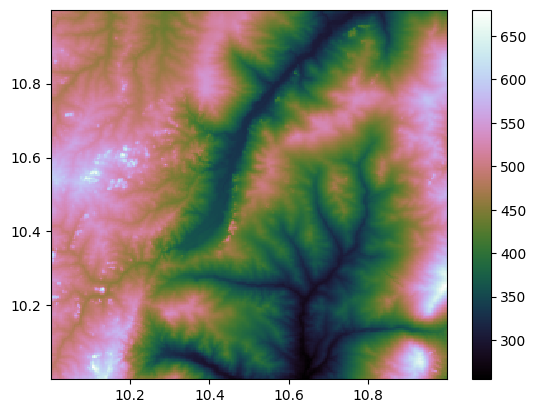

In [55]:
plt.pcolormesh(lon, lat, el, cmap='cubehelix')
plt.colorbar()

Requested bbox: lat(18, 23), lon(-161, -154)
Selected 1200 lats, 1680 lons
Actual lat range: [18.00208333 18.00625    18.01041667 ... 22.98958333 22.99375
 22.99791667]
Actual lon range: [-160.99791667 -160.99375    -160.98958333 ... -154.01041667 -154.00625
 -154.00208333]


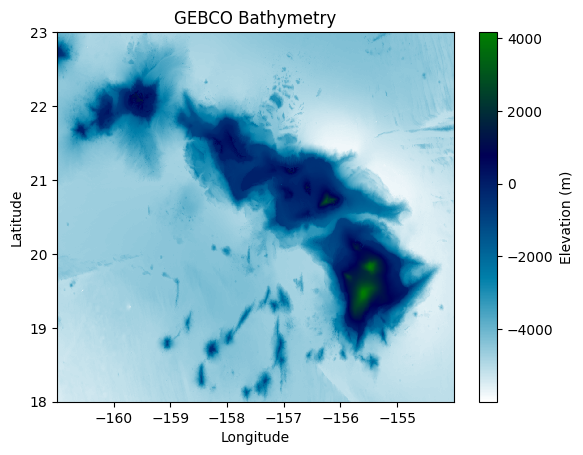

In [34]:
# Define bounding box for Hawaii (approximate values)
min_lon, max_lon = -161, -154
min_lat, max_lat = 18, 23

# Select the region around Hawaii
elev_array, lat_array, lon_array = gb[(min_lat, max_lat, min_lon, max_lon)]

plt.pcolormesh(lon_array, lat_array, elev_array, cmap='ocean_r')
# plt.pcolormesh(gb.lons, gb.lats, gb.elev, cmap='ocean_r')
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GEBCO Bathymetry')
plt.show()

In [61]:
gb.lats

array([-89.99791667, -89.99375   , -89.98958333, ...,  89.98958333,
        89.99375   ,  89.99791667], shape=(43200,))